## Classification_algorithms_for_customer_churn

In [1]:
#import requeired libraries
import pandas as pd
import numpy as np
import seaborn as sns 

from sklearn.model_selection import train_test_split

#import models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

# Evaluation metrics related methods
from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_recall_fscore_support, confusion_matrix, precision_score, recall_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from matplotlib.pyplot import figure
import matplotlib.pylab as plt
%matplotlib inline

 *** Data description ***

This dataset belongs to an e-Commerce company. Which wants to know the clients that are going to churn. The dataset includes
customer that churn; customer account information – how long they’ve been a customer, payment method; demographic info about 
customers. 

# Objectives 

The main onjective for this project is to developed some classifiers models to predict customer churn for a e-commerce company and propose one to employ as a predicitive tool for future analysis, for this we propose the following specific objectives:
    Explore the data and prepare for analysys
    Analyse the distribution of the classes and propose solutions to overcome the imbalanced problem
    Develop machine learning models to predict if a custumer will churn or will not churn
    Evaluate the performance of the developed models
    Recommend a model to predict if custumer will churn or will not

In [2]:
data=pd.read_excel('E_Commerce_Dataset.xlsx', sheet_name='E Comm')
data.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


***Data preprocessing and cleaning***

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [4]:
data.nunique()

CustomerID                     5630
Churn                             2
Tenure                           36
PreferredLoginDevice              3
CityTier                          3
WarehouseToHome                  34
PreferredPaymentMode              7
Gender                            2
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
PreferedOrderCat                  6
SatisfactionScore                 5
MaritalStatus                     3
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      16
CouponUsed                       17
OrderCount                       16
DaySinceLastOrder                22
CashbackAmount                 2586
dtype: int64

In [5]:
#Looking for duplicated data
duplicate = data[data.duplicated(['CustomerID'])]
duplicate

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount


In [3]:
#Since our objective is to determine if a customer will churn or not, columns that are not relatd or does not add value to
#the analysis were deleted. 
df = data.drop(columns={'CustomerID', 'PreferedOrderCat', 'Gender', 'CityTier', 'WarehouseToHome', 'MaritalStatus', 'NumberOfAddress', 'CouponUsed'})
df.head()

,Churn,Tenure,PreferredLoginDevice,PreferredPaymentMode,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,Complain,OrderAmountHikeFromlastYear,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,Debit Card,3.0,3,2,1,11.0,1.0,5.0,159.93
1,1,NaN,Phone,UPI,3.0,4,3,1,15.0,1.0,0.0,120.90
2,1,NaN,Phone,Debit Card,2.0,4,3,1,14.0,1.0,3.0,120.28
3,1,0.0,Phone,Debit Card,2.0,4,5,0,23.0,1.0,3.0,134.07
4,1,0.0,Phone,CC,NaN,3,5,0,11.0,1.0,3.0,129.60


*** Handling missing values ***

In [7]:
df.isnull().sum()

Churn                            0
Tenure                         264
PreferredLoginDevice             0
PreferredPaymentMode             0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
SatisfactionScore                0
Complain                         0
OrderAmountHikeFromlastYear    265
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

Text(0.5, 1.0, 'Total Missing Values')

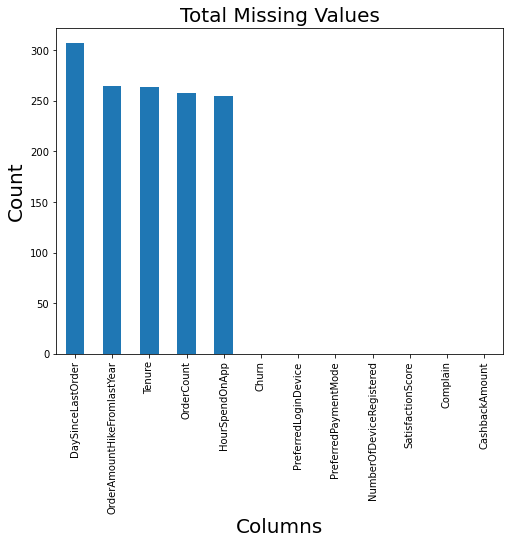

In [8]:
# Displaying missing values
total = df.isnull().sum().sort_values(ascending=False)
total_select = total.head(20)
total_select.plot(kind="bar", figsize = (8,6), fontsize = 10)

plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20)

In [4]:
#In this way features with messing values are filled out with the media, mean or any other statistic. 
median = df["DaySinceLastOrder"].median()
mean = df['HourSpendOnApp'].mean()

In [5]:
df["DaySinceLastOrder"].fillna(median, inplace = True) #To fill out NaN with the median
df["HourSpendOnApp"].fillna(mean, inplace = True)

In [7]:
#To drod NaN in all rows
new_df=df.dropna()
#Drop the full col is another alternative 

In [8]:
new_df.isnull().sum()

Churn                          0
Tenure                         0
PreferredLoginDevice           0
PreferredPaymentMode           0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
SatisfactionScore              0
Complain                       0
OrderAmountHikeFromlastYear    0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

Features DaySinceLastOrder and HourSpendOnApp were filled out with their median and all others with missing values were dropped out, now we have a clean dataset without missing values.

*** Feature engineering ***  
Data type objects columns PreferredLoginDevice and PreferredPaymentMode are transformed to include in the analysis

In [9]:
new_df['PreferredPaymentMode'].value_counts()

Debit Card          2006
Credit Card         1297
E wallet             550
UPI                  357
COD                  355
CC                   193
Cash on Delivery      85
Name: PreferredPaymentMode, dtype: int64

In [10]:
new_df['PreferredPaymentMode'].unique().tolist()
new_df.replace({"Debit Card":0,"Credit Card":1,"E wallet":2, "UPI":3, "COD":4, "CC":5, "Cash on Delivery":6},inplace=True)

C:\Users\Javier\AppData\Local\Temp\ipykernel_5412\2295923371.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.replace({"Debit Card":0,"Credit Card":1,"E wallet":2, "UPI":3, "COD":4, "CC":5, "Cash on Delivery":6},inplace=True)


In [11]:
new_df['PreferredLoginDevice'].value_counts()

Mobile Phone    2347
Computer        1414
Phone           1082
Name: PreferredLoginDevice, dtype: int64

*** Data findings ***

The original dataset was composed by float64(8), int64(7) and object(5) data types, 19 features and 5630 entries. 
There were no duplicates. The features 'DaySinceLastOrder' (307), 'OrderAmountHikeFromlastYear' (265), 'Tenure' (264), 'OrderCount' (258) and 'HourSpendOnApp' (255) had missing values. 

Taking in cosideration that the objective is to predict if a custumer will or will not churn, the features 'CustomerID', 'PreferedOrderCat', 'Gender', 'CityTier', 'WarehouseToHome', 'MaritalStatus', 'NumberOfAddress' and 'CouponUsed' were deleted due to its low importance and relation with the varible outcome.  

To proceed with the analysis, the features 'PreferredLoginDevice' and 'PreferredPaymentMode' were labeled encoded aiming to include in the modelling.

The resulting dataset is constituted by 11 features and the outcome variable.

In [12]:
new_df['PreferredLoginDevice'].unique().tolist()
new_df.replace({"Mobile Phone":0,"Computer":1,"Phone":0},inplace=True)

C:\Users\Javier\AppData\Local\Temp\ipykernel_5412\3485952789.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.replace({"Mobile Phone":0,"Computer":1,"Phone":0},inplace=True)


# Classifier models

In [17]:
#A method to split training and testing dataset
rs = 123
def split_data(df):
    X = df.loc[ : , df.columns != 'Churn']
    y = df['Churn'].astype('int')
    return train_test_split(X, y, test_size=0.2, stratify=y, random_state = rs)

In [13]:
x=new_df.loc[:, new_df.columns != 'Churn']
x.tail()

,Tenure,PreferredLoginDevice,PreferredPaymentMode,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,Complain,OrderAmountHikeFromlastYear,OrderCount,DaySinceLastOrder,CashbackAmount
5625,10.0,1,1,3.0,2,1,0,18.0,2.0,4.0,150.71
5626,13.0,0,1,3.0,5,5,0,16.0,2.0,3.0,224.91
5627,1.0,0,0,3.0,2,4,1,21.0,2.0,4.0,186.42
5628,23.0,1,1,4.0,5,4,0,15.0,2.0,9.0,178.90
5629,8.0,0,1,3.0,2,3,0,13.0,2.0,3.0,169.04


In [19]:
#Method to define and tune logistic regression model
rs = 123
def build_lr(X_train, y_train, X_test, threshold=0.5, best_params=None):
    
    model = LogisticRegression(random_state=rs, 
                              max_iter = 1000)
    # If best parameters are provided
    if best_params:
        model = LogisticRegression(penalty = 'l2',
                              random_state=rs, 
                              max_iter = 1000,
                              class_weight=best_params['class_weight'])
    # Train the model
    model.fit(X_train, y_train)
    # If predicted probability is larger than threshold (default value is 0.5), generate a positive label
    predicted_proba = model.predict_proba(X_test)
    yp = (predicted_proba [:,1] >= threshold).astype('int')
    return yp, model

In [20]:
#A method to define and train a random forest:
def build_rf(X_train, y_train, X_test, threshold=0.5, best_params=None):
    
    model = RandomForestClassifier(random_state = rs)
    # If best parameters are provided
    if best_params:
        model = RandomForestClassifier(random_state = rs,
                                   # If bootstrap sampling is used
                                   bootstrap = best_params['bootstrap'],
                                   # Max depth of each tree
                                   max_depth = best_params['max_depth'],
                                   # Class weight parameters
                                   class_weight=best_params['class_weight'],
                                   # Number of trees
                                   n_estimators=best_params['n_estimators'],
                                   # Minimal samples to split
                                   min_samples_split=best_params['min_samples_split'])
    # Train the model   
    model.fit(X_train, y_train)
    # If predicted probability is largr than threshold (default value is 0.5), generate a positive label
    predicted_proba = model.predict_proba(X_test)
    yp = (predicted_proba [:,1] >= threshold).astype('int')
    return yp, model

In [22]:
#A method to evaluate a classifier's predictions
rs = 123
def evaluate(yt, yp, eval_type="Original"):
    results_pos = {}
    results_pos['type'] = eval_type
    # Accuracy
    results_pos['accuracy'] = accuracy_score(yt, yp)
    # Precision, recall, Fscore
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, beta=5, pos_label=1, average='binary')
    results_pos['recall'] = recall
    # AUC
    results_pos['auc'] = roc_auc_score(yt, yp)
    # Precision
    results_pos['precision'] = precision
    # Fscore
    results_pos['fscore'] = f_beta
    return results_pos

In [23]:
#A method to resample the original dataset
def resample(X_train, y_train):
    # SMOTE sampler (Oversampling)
    smote_sampler = SMOTE(random_state = 123)
    # Undersampling
    under_sampler = RandomUnderSampler(random_state=123)
    # Resampled datasets
    X_smo, y_smo = smote_sampler.fit_resample(X_train, y_train)
    X_under, y_under = under_sampler.fit_resample(X_train, y_train)
    return X_smo, y_smo, X_under, y_under

In [24]:
#A method to visualize metrics
def visualize_eval_metrics(results):
    df = pd.DataFrame(data=results)
    #table = pd.pivot_table(df, values='type', index=['accuracy', 'precision', 'recall', 'f1', 'auc'],
    #                columns=['type'])
    #df = df.set_index('type').transpose()
    print(df)
    x = np.arange(5)
    original = df.iloc[0, 1:].values
    class_weight = df.iloc[1, 1:].values
    smote = df.iloc[2, 1:].values
    under = df.iloc[3, 1:].values
    width = 0.2
    figure(figsize=(12, 10), dpi=80)
    plt.bar(x-0.2, original, width, color='#95a5a6')
    plt.bar(x, class_weight, width, color='#d35400')
    plt.bar(x+0.2, smote, width, color='#2980b9')
    plt.bar(x+0.4, under, width, color='#3498db')
    plt.xticks(x, ['Accuracy', 'Recall', 'AUC', 'Precision', 'Fscore'])
    plt.xlabel("Evaluation Metrics")
    plt.ylabel("Score")
    plt.legend(["Original", "Class Weight", "SMOTE", "Undersampling"])
    plt.show()

*** Modelling ***

In [25]:
new_df.head()

,Churn,Tenure,PreferredLoginDevice,PreferredPaymentMode,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,Complain,OrderAmountHikeFromlastYear,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,0,0,3.000000,3,2,1,11.0,1.0,5.0,159.93
3,1,0.0,0,0,2.000000,4,5,0,23.0,1.0,3.0,134.07
4,1,0.0,0,5,2.931535,3,5,0,11.0,1.0,3.0,129.60
5,1,0.0,1,0,3.000000,5,5,1,22.0,6.0,7.0,139.19
8,1,13.0,0,2,2.931535,4,3,1,14.0,1.0,2.0,126.83


In [26]:
X_train, X_test, y_train, y_test = split_data(new_df)

In [27]:
new_df.iloc[:, 0].value_counts(normalize=True)

0    0.827586
1    0.172414
Name: Churn, dtype: float64

<AxesSubplot:>

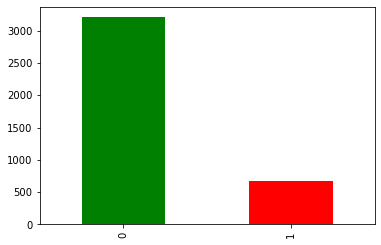

In [28]:
y_train.value_counts().plot.bar(color=['green', 'red'])

As we can see from the bar chart above, the non-churn customers are almost 4 times more than the churn customers, which makes it an imbalanced dataset as well.

# *** Model 1: Random Forest ***

In [101]:
best_params_no_weight = {'bootstrap': True,
                         'class_weight': None, 
                         'max_depth': 10, 
                         'min_samples_split': 5, 
                         'n_estimators': 50}

In [30]:
results=[]

In [31]:
#model original distribution
preds, model = build_rf(X_train, y_train, X_test, best_params=best_params_no_weight)
result = evaluate(y_test, preds, "Original")
print(result)
results.append(result)


{'type': 'Original', 'accuracy': 0.9267285861713106, 'recall': 0.6646706586826348, 'auc': 0.8229837083936864, 'precision': 0.8809523809523809, 'fscore': 0.6710067426179959}


The original model performs well in most of the metrics. Recall and f1 are low and are the important ones in this analysis, so let's explore some variations of this model.  

*** RF modelt with weights ***

In [32]:
#RF weights 
class_weight = {}
# 0.2 to Non-churn class
class_weight[0] = 0.2
# 0.8 to Churn class
class_weight[1] = 0.8

In [33]:
# Pre-tuned hyper parameters
best_params_weight = {'bootstrap': True,
                         'class_weight': class_weight, 
                         'max_depth': 10, 
                         'min_samples_split': 5, 
                         'n_estimators': 50}

In [34]:
#Build the model 
preds_cw, weight_model = build_rf(X_train, y_train, X_test, best_params=best_params_weight)

In [35]:
#Model performance evaluation 
result = evaluate(y_test, preds_cw, "Class Weight")
print(result)
results.append(result)

{'type': 'Class Weight', 'accuracy': 0.9184726522187823, 'recall': 0.7664670658682635, 'auc': 0.8582958770737826, 'precision': 0.7619047619047619, 'fscore': 0.7662905825466269}


No we have a more balanced model, accuraccy decrease a bit while recall and fscore increased. This is an indication that class reweithing is a effective for this unbalanced dataset

 *** RF Resampling ***

In [36]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [37]:
#SMOTE and Undersampling
X_smo, y_smo, X_under, y_under = resample(X_train, y_train)

In [38]:
#SMOTE
preds_smo, smo_model = build_rf(X_smo, y_smo, X_test, best_params=best_params_no_weight)
result = evaluate(y_test, preds_smo, "SMOTE")
print(result)
results.append(result)

{'type': 'SMOTE', 'accuracy': 0.8968008255933952, 'recall': 0.8023952095808383, 'auc': 0.8594270312243344, 'precision': 0.6666666666666666, 'fscore': 0.7961608775137113}


Oversampling helps increasing recall and f1, this indicate that oversample works well for this kind of problem. Even thoug precision decrease, it could be a source to improve operations assumming that there will be more false positive. 

In [39]:
#Undersampling
preds_under, under_model = build_rf(X_under, y_under, X_test, best_params=best_params_no_weight)
result = evaluate(y_test, preds_under, "Undersampling")
print(result)
results.append(result)

{'type': 'Undersampling', 'accuracy': 0.8668730650154799, 'recall': 0.8502994011976048, 'auc': 0.8603117953618946, 'precision': 0.5772357723577236, 'fscore': 0.8351051798235695}


            type  accuracy    recall       auc  precision    fscore
0       Original  0.926729  0.664671  0.822984   0.880952  0.671007
1   Class Weight  0.918473  0.766467  0.858296   0.761905  0.766291
2          SMOTE  0.896801  0.802395  0.859427   0.666667  0.796161
3  Undersampling  0.866873  0.850299  0.860312   0.577236  0.835105


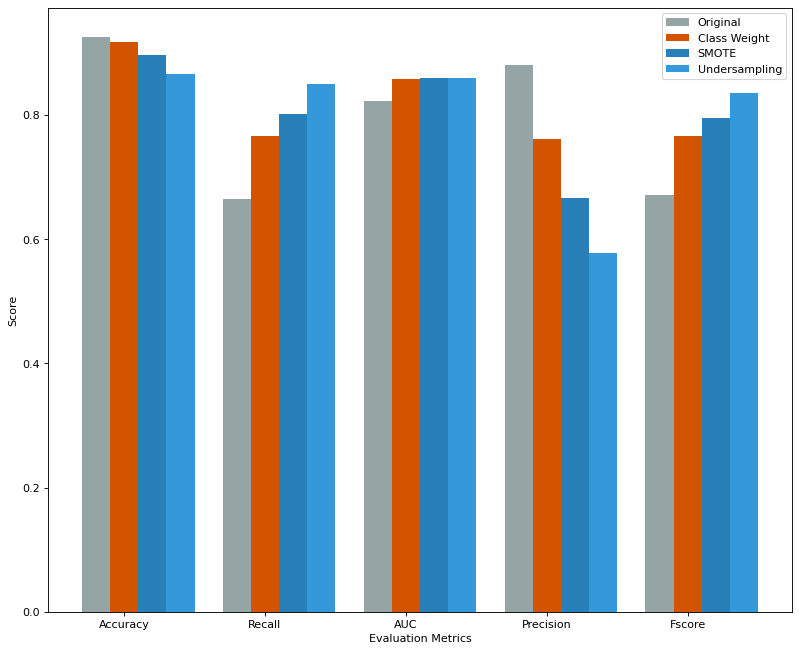

In [40]:
visualize_eval_metrics(results)

From the above char we can infer:
    
    all models have high aacuracy
    undersampling shows the highest recall and fscore and the lowest precision 
    AUC performs good in all the models
    the original model has the highest accuracy and precision
    
Thus, the undersampling model looks like the best model for this churn imbalanced dataset, it helps to overcome the problem with 
the classes and perfoms well for all the metrics. Having a low precision(more false positives) can help firms(in this case) 
to improve operations.

# *** Model 2: Logistic Regression ***

In [46]:
#LR original distribution
results_lr = []
preds, model = build_lr(X_train, y_train, X_test)
result_lr = evaluate(y_test, preds)
print(result_lr)
results_lr.append(result_lr)

{'type': 'Original', 'accuracy': 0.8771929824561403, 'recall': 0.4550898203592814, 'auc': 0.7100885510773963, 'precision': 0.7307692307692307, 'fscore': 0.46179013788268297}


The LR base model perform worst than the RF model in all metrics. So, let's try some model improvments via wieghts and resampling. 

*** LR with weights ***

In [47]:
#LR with weights
best_params_weights = {'class_weight': {0: 0.2, 1: 0.8}}

#class-weights
preds, model = build_lr(X_train, y_train, X_test, best_params=best_params_weights)
result_lr = evaluate(y_test, preds, 'Weight')
print(result_lr)
results_lr.append(result_lr)

{'type': 'Weight', 'accuracy': 0.7698658410732714, 'recall': 0.7365269461077845, 'auc': 0.7566674630788299, 'precision': 0.40728476821192056, 'fscore': 0.7143176234085327}


Recall and f1 scores improve whereas precision and accuracy shrink

*** LR Resampling ***

In [43]:
#LR SMOTE and undersampling
X_smo, y_smo, X_under, y_under = resample(X_train, y_train)

In [48]:
#LR SMOTE
preds_smo, model_smo = build_lr(X_smo, y_smo, X_test)
result_lr = evaluate(y_test, preds_smo, 'SMOTE')
print(result_lr)
results_lr.append(result_lr) #Best model

{'type': 'SMOTE', 'accuracy': 0.7275541795665634, 'recall': 0.7844311377245509, 'auc': 0.7500709304582854, 'precision': 0.3649025069637883, 'fscore': 0.7512130569033963}


In [49]:
#LR undersampling
preds_under, model_under =build_lr(X_under, y_under, X_test)
result_lr=evaluate(y_test, preds_under, 'Undersampling')
print(result_lr)
results_lr.append(result_lr)

{'type': 'Undersampling', 'accuracy': 0.7358101135190919, 'recall': 0.7664670658682635, 'auc': 0.7479467498917377, 'precision': 0.3710144927536232, 'fscore': 0.736283185840708}


Recall and f1 increase with oversampling while accuracy and precision reach better scores for undersampling. SMOTE is better for this problem. 

            type  accuracy    recall       auc  precision    fscore
0       Original  0.877193  0.455090  0.710089   0.730769  0.461790
1         Weight  0.769866  0.736527  0.756667   0.407285  0.714318
2          SMOTE  0.727554  0.784431  0.750071   0.364903  0.751213
3  Undersampling  0.735810  0.766467  0.747947   0.371014  0.736283


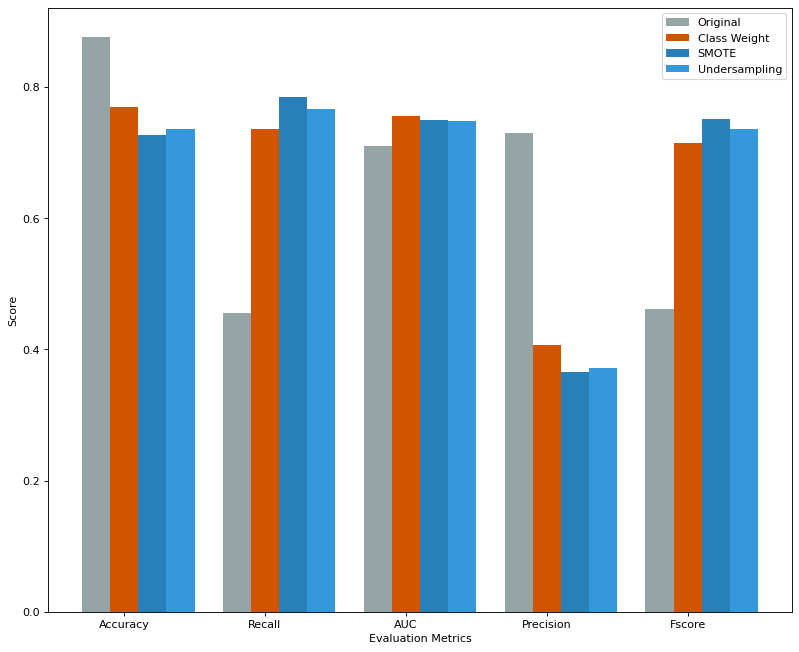

In [50]:
visualize_eval_metrics(results_lr) #SMOTE better results

# *** Model 3: Support Vector Machine ***

In [60]:
params_grid = {
    'C': [1, 10, 100],
    'kernel': ['poly', 'rbf', 'sigmoid']
}

In [57]:
model = SVC(random_state=rs)

In [61]:
# Define a GridSearchCV to search the best parameters
grid_search = GridSearchCV(estimator = model, 
                           param_grid = params_grid, 
                           scoring='f1',
                           cv = 5, verbose = 1)
# Search the best parameters with training data
grid_search.fit(X_train, y_train.values.ravel())
best_params = grid_search.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [62]:
best_params

{'C': 100, 'kernel': 'rbf'}

In [63]:
model = SVC(C=100, kernel='rbf')
model.fit(X_train, y_train.values.ravel())
preds = model.predict(X_test)

In [96]:
results_SVM=[]
result_SVM=evaluate(y_test, preds, 'Original')
print(result_SVM)
results_SVM.append(result_SVM)

{'type': 'Original', 'accuracy': 0.7616099071207431, 'recall': 0.7724550898203593, 'auc': 0.7659033553839951, 'precision': 0.40062111801242234, 'fscore': 0.7458305537024682}


Results from SVM are better than previous models for recall and f1 score in the original model. However, accuracy and precision are the lowest ones among the thre models. Lets try some modifications. 

*** Support Vector Machine model with weights ***

In [67]:
model = SVC(C=100, kernel='rbf', class_weight= {0: 0.2, 1: 0.8})
model.fit(X_train, y_train.values.ravel())
preds_svm = model.predict(X_test)

In [97]:
result_SVM=evaluate(y_test, preds_svm, 'Weights')
print(result_SVM)
results_SVM.append(result_SVM)

{'type': 'Weights', 'accuracy': 0.7564499484004128, 'recall': 0.7904191616766467, 'auc': 0.769897860140069, 'precision': 0.3963963963963964, 'fscore': 0.7613132209405502}


 Assign class weights improved the model for recall and f1. 

 *** SVM model SMOTE ***

In [69]:
#SMOTE and Undersampling
X_smo, y_smo, X_under, y_under = resample(X_train, y_train)

In [98]:
#LR SMOTE
model = SVC(C=100, kernel='rbf')
model.fit(X_smo, y_smo.values.ravel())
preds_svm = model.predict(X_test)

result_SVM = evaluate(y_test, preds_svm, 'SMOTE')
print(result_SVM)
results_SVM.append(result_SVM)

{'type': 'SMOTE', 'accuracy': 0.7564499484004128, 'recall': 0.7904191616766467, 'auc': 0.769897860140069, 'precision': 0.3963963963963964, 'fscore': 0.7613132209405502}


 *** SVM model undersampling ***

In [99]:
#SVM undersampling
model = SVC(C=100, kernel='rbf')
model.fit(X_under, y_under.values.ravel())
preds_svm = model.predict(X_test)

result_SVM = evaluate(y_test, preds_svm, 'Undersampling')
print(result_SVM)
results_SVM.append(result_SVM)

{'type': 'Undersampling', 'accuracy': 0.7502579979360166, 'recall': 0.7844311377245509, 'auc': 0.7637866411814775, 'precision': 0.3887240356083086, 'fscore': 0.7548758865248226}


In [ ]:
SVM model with SMOTE does better than tne LR model in recall and f1 scores.

            type  accuracy    recall       auc  precision    fscore
0       Original  0.761610  0.772455  0.765903   0.400621  0.745831
1        Weights  0.756450  0.790419  0.769898   0.396396  0.761313
2          SMOTE  0.756450  0.790419  0.769898   0.396396  0.761313
3  Undersampling  0.750258  0.784431  0.763787   0.388724  0.754876


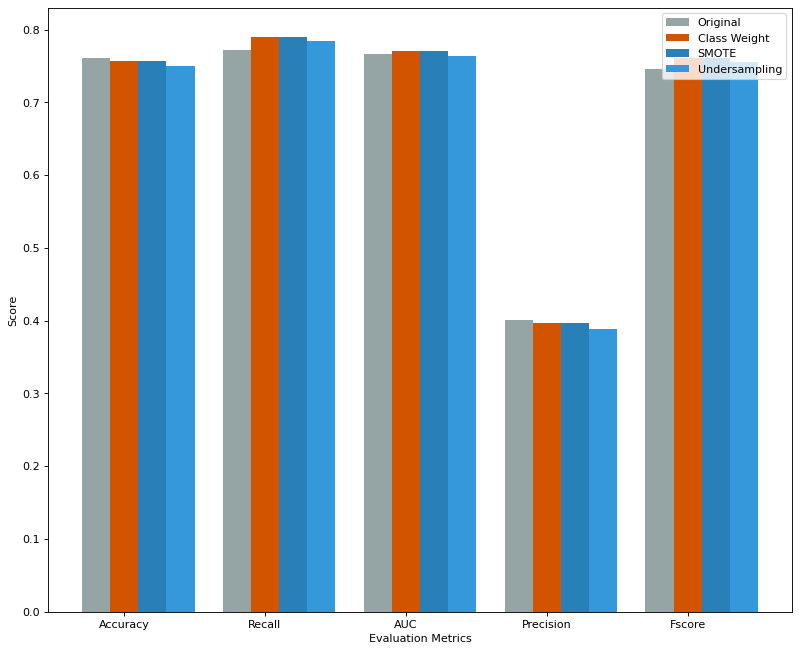

In [100]:
visualize_eval_metrics(results_SVM)

# Model selection 

All models perfomrs fairly well, to select the final model or to propose one taking in considaration that this is a imbalanced class problem, recall and F1 score were selected as critial metrics and basoed on this, the RF model with undersampling is proposed because performs better in these two metrics also it has a good perfom in accuracy and precision. Therefore, the RF model is selected and recommended to use as a predictive tool as well as to explore more in depth. 

*** Key findings  ***
The dataset in general was good enough to model
Some feature trasnformations were made to developed the models and other features were discarded due to its lack of value for modelling
Some features were filled out with the median and other that contain many missing values or NaN values were deleted
In this project we analyzed three models, Logistic Regression, Random Forest and Support Vector Machines, for these three models as the class was imbalanced strategies to resolve the issue were taken. Oversampling, undersampling and class weights were used for each of the three models.
The model that best suits the problem and the data available is the RF with Undersampling, this model shows the highest recall and F1, which are the recommended metrics for an imbalanced class problem.

    

*** Further steps ***

    Use different models such as KNN, decision trees, embeded models or boosting strategies.
    Take a look into outliers and explore option to include in the analysis or discarded them
    Some flaws in this project could be due to the limited models proposed to overcome that is suggested to:
        Use gridsearch for RF and LR models
        Do some cross validation 
    The media and mean were used to filled out some missing values, an option could be explore more options to fill out 
    these missing values
    If more data is avalable will be useful to include and explore more models
    
    
    